In [1]:
import sqlite3
conn = sqlite3.connect('Worldpopulation.db')
c = conn.cursor()
import matplotlib.pyplot as plt
import pandas as pd

#ამოირჩიოს ქვეყანა, რომლის ნაყოფიერების მაჩვენებელია 2.5-ზე მეტი
query1 = """
    SELECT Country, "Fert. Rate", "Population (2024)"
    FROM "Wolrd Population Data"
    WHERE "Fert. Rate" > 2.5
    ORDER BY "Fert. Rate" DESC
"""
c.execute(query1)

row = c.fetchone()  # ვიღებთ მხოლოდ ერთ პირველ შედეგს, რომელიც tuple მონაცემია.
print("ქვეყანა:", row[0], " ნაყოფიერების მაჩვენებელი:", row[1], " მოსახლეობა:", row[2]) #ვპრინტავთ მას


ქვეყანა: DR Congo  ნაყოფიერების მაჩვენებელი: 6.0  მოსახლეობა: 109,276,265


In [13]:
# ქვეყნები, სადაც ქალაქში მცხოვრები მოსახლეობა 80%-ზე მეტია
query2 = """
SELECT Country, "Urban Pop %", "Population (2024)"
FROM "Wolrd Population Data"
WHERE "Urban Pop %" > 80
"""
c.execute(query2)
rows = c.fetchmany(3)  # ვიღებთ მხოლოდ პირველ 3 ქვეყანას
#ვბეჭდავთ 3-ს
for row in rows:
    print("ქვეყანა:", row[0], " ურბანული მოსახლეობა:", row[1], "% მოსახლეობა:", row[2])

ქვეყანა: United States  ურბანული მოსახლეობა: 82 % % მოსახლეობა: 345,426,571
ქვეყანა: Brazil  ურბანული მოსახლეობა: 91 % % მოსახლეობა: 211,998,573
ქვეყანა: Mexico  ურბანული მოსახლეობა: 87 % % მოსახლეობა: 130,861,007


In [14]:
#ქვეყნები, სადაც ნაყოფიერების მაჩვენებელი Fert. Rate მეტია 2-ზე
query3 = """
SELECT Country, "Fert. Rate"
FROM "Wolrd Population Data"
WHERE "Fert. Rate" > 2
"""
c.execute(query3)
results = c.fetchall()  # ვიღებთ ყველა შედეგს
# თითოეულის დაბეჭდვა
for row in results:
    print("ქვეყანა:", row[0], " ნაყოფიერების მაჩვენებელი:", row[1])

ქვეყანა: Indonesia  ნაყოფიერების მაჩვენებელი: 2.1
ქვეყანა: Pakistan  ნაყოფიერების მაჩვენებელი: 3.5
ქვეყანა: Nigeria  ნაყოფიერების მაჩვენებელი: 4.4
ქვეყანა: Bangladesh  ნაყოფიერების მაჩვენებელი: 2.1
ქვეყანა: Ethiopia  ნაყოფიერების მაჩვენებელი: 3.9
ქვეყანა: Egypt  ნაყოფიერების მაჩვენებელი: 2.7
ქვეყანა: DR Congo  ნაყოფიერების მაჩვენებელი: 6.0
ქვეყანა: Tanzania  ნაყოფიერების მაჩვენებელი: 4.5
ქვეყანა: South Africa  ნაყოფიერების მაჩვენებელი: 2.2
ქვეყანა: Kenya  ნაყოფიერების მაჩვენებელი: 3.2
ქვეყანა: Myanmar  ნაყოფიერების მაჩვენებელი: 2.1
ქვეყანა: Sudan  ნაყოფიერების მაჩვენებელი: 4.3
ქვეყანა: Uganda  ნაყოფიერების მაჩვენებელი: 4.2
ქვეყანა: Algeria  ნაყოფიერების მაჩვენებელი: 2.7
ქვეყანა: Iraq  ნაყოფიერების მაჩვენებელი: 3.2
ქვეყანა: Afghanistan  ნაყოფიერების მაჩვენებელი: 4.8
ქვეყანა: Yemen  ნაყოფიერების მაჩვენებელი: 4.5
ქვეყანა: Morocco  ნაყოფიერების მაჩვენებელი: 2.2
ქვეყანა: Angola  ნაყოფიერების მაჩვენებელი: 5.0
ქვეყანა: Uzbekistan  ნაყოფიერების მაჩვენებელი: 3.5
ქვეყანა: Mozambique  ნაყოფიერები

In [15]:
# მომხმარებლისგან მონაცემების მიღება
country = input("შეიყვანეთ ახალი ქვეყნის სახელი: ")
population = input("შეიყვანეთ მოსახლეობა: ")
urban_pop = input("შეიყვანეთ ურბანული მოსახლეობა %: ")
world_share = input("შეიყვანეთ მსოფლიოს მოსახლეობის წილი: ")

# # ვამატებთ ახალ ჩანაწერს ცხრილში
insert_query = """
    INSERT INTO "Wolrd Population Data" (Country, "Population (2024)", "Urban Pop %", "World Share")
    VALUES (?, ?, ?, ?)
"""
c.execute(insert_query, (country, population, urban_pop, world_share))
conn.commit()  # რომ აისახოს ბაზაში ცვლილებები

შეიყვანეთ ახალი ქვეყნის სახელი:  ლაპლანდია
შეიყვანეთ მოსახლეობა:  50000
შეიყვანეთ ურბანული მოსახლეობა %:  4
შეიყვანეთ მსოფლიოს მოსახლეობის წილი:  1


In [16]:
# მომხმარებლისგან ვიღებთ ინფორმაციას განახლებისთვის
country = input("შეიყვანეთ ქვეყნის სახელი, რომლის ჩანაწერის განახლება გსურთ: ")
new_population = input("შეიყვანეთ ახალი მოსახლეობის რაოდენობა: ")
new_urban_pop = input("შეიყვანეთ ახალი ურბანული მოსახლეობის პროცენტი(მიუთითეთ პროცენტით): ")
new_world_share = input("შეიყვანეთ ახალი მსოფლიო მოსახლეობის წილი(მიუთითეთ პროცენტით): ")

update_query = """
    UPDATE "Wolrd Population Data"
    SET "Population (2024)" = ?, "Urban Pop %" = ?, "World Share" = ?
    WHERE Country = ?
"""
# ბრძანების შესრულება მომხმარებლის მიერ შეყვანილი მონაცემებით
c.execute(update_query, (new_population, new_urban_pop, new_world_share, country))
conn.commit()

შეიყვანეთ ქვეყნის სახელი, რომლის ჩანაწერის განახლება გსურთ:  ლაპლანდია
შეიყვანეთ ახალი მოსახლეობის რაოდენობა:  100000000
შეიყვანეთ ახალი ურბანული მოსახლეობის პროცენტი(მიუთითეთ პროცენტით):  15
შეიყვანეთ ახალი მსოფლიო მოსახლეობის წილი(მიუთითეთ პროცენტით):  1%


In [17]:
# #მომხმარებლისგან ვიღებთ ქვეყანას, რომლის ჩანაწერი წაიშლება.
country_to_delete = input("შეიყვანეთ ქვეყნის სახელი, რომლის ჩანაწერის წაშლა გსურთ: ")

#ქვეყნის სახელის მიხედვით ცხრილიდან იშლება ქვეყანა.
delete_query = """
    DELETE FROM "Wolrd Population Data"
    WHERE Country = ?
"""

c.execute(delete_query, (country_to_delete,))
conn.commit()

შეიყვანეთ ქვეყნის სახელი, რომლის ჩანაწერის წაშლა გსურთ:  ლაპლანდია


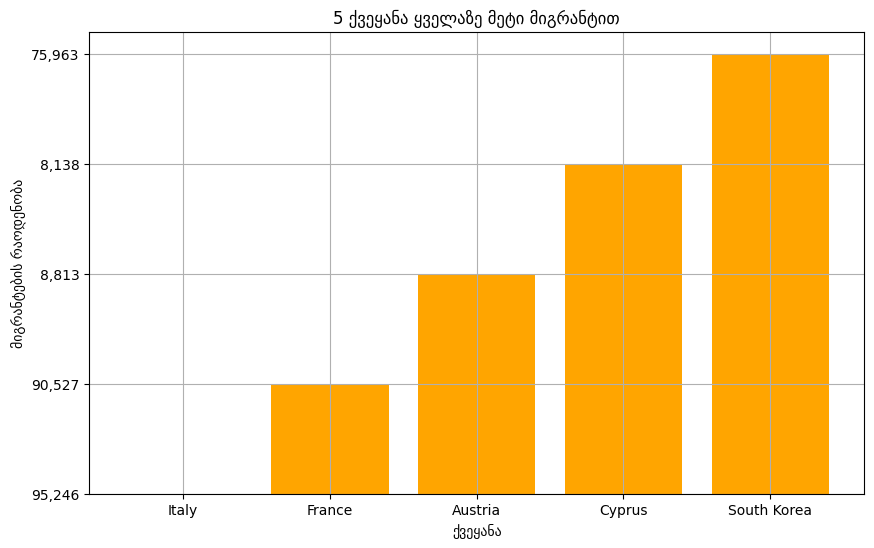

In [18]:
# ავირჩიოთ  5 ქვეყანა ყველაზე მეტი მიგრანტით
query_migrants = """
    SELECT Country, "Migrants (net)"
    FROM "Wolrd Population Data"
    WHERE "Migrants (net)" IS NOT NULL
    ORDER BY "Migrants (net)" DESC
    LIMIT 5
"""
df = pd.read_sql_query(query_migrants, conn)#პანდასით დატაფრეიმად გარდაქმნა.
#სვეტური დიაგრამის აგება
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Migrants (net)'], color='orange')
plt.title('5 ქვეყანა ყველაზე მეტი მიგრანტით')
plt.xlabel('ქვეყანა')
plt.ylabel('მიგრანტების რაოდენობა')
plt.grid(True)
plt.show()

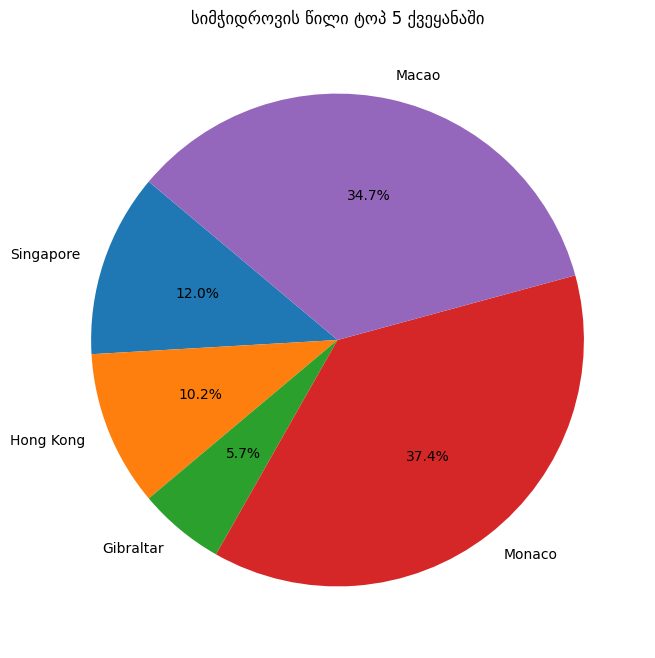

In [19]:
#5 ქვეყანა ყველაზე მაღალი სიმჭიდროვით
query_density = """
    SELECT Country, "Density (P/Km²)"
    FROM "Wolrd Population Data"
    WHERE "Density (P/Km²)" IS NOT NULL
    ORDER BY "Density (P/Km²)" DESC
    LIMIT 5
"""
df = pd.read_sql_query(query_density, conn)

# სტრიქონებიდან რიცხვებად გარდაქმნა ("," წავშალოთ) (ამის გარეშე ერორს გვაძლევს და ითხოვს სტრინგების კონვერტაციას)
density_values = []
for value in df["Density (P/Km²)"]:
    cleaned = value.replace(",", "").strip() #ვშლით მძიმეებს და ზედმეტ სივრცეებს
    density_values.append(int(cleaned)) # ვაქცევთ მთელ რიცხვად და ვამატებთ სიაში

# ვამატებთ ახალ სვეტს ცხრილში
df["Density (P/Km²)"] = density_values
# წრიული დიაგრამა (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(df["Density (P/Km²)"], labels=df["Country"], autopct='%1.1f%%', startangle=140)
plt.title('სიმჭიდროვის წილი ტოპ 5 ქვეყანაში')
plt.show()

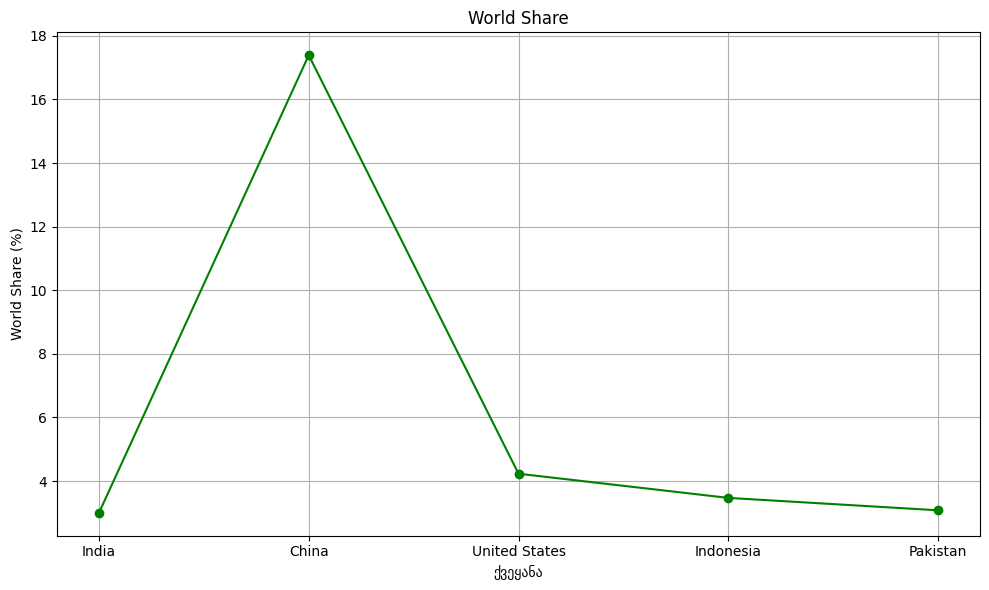

In [20]:
#ავიღოთ ქვეყნები მსოფლიოს წილით
query_worldshare = """
    SELECT Country, "World Share"
    FROM "Wolrd Population Data"
    WHERE "World Share" IS NOT NULL
    LIMIT 5
"""
df = pd.read_sql_query(query_worldshare, conn)
# ახალი სვეტის შექმნა ცარიელი ლისტით
world_share_floats = []
#კონვერტაცია იმავე ლოგიკით
for value in df["World Share"]:
    clean_val = value.replace('%', '').strip()
    world_share_floats.append(float(clean_val))

df["World_Share_Float"] = world_share_floats
#ხაზოვანი დიაგრამის აგება
plt.figure(figsize=(10,6))
plt.plot(df["Country"], df["World_Share_Float"], marker='o', linestyle='-', color='green')
plt.title("World Share")
plt.xlabel("ქვეყანა")
plt.ylabel("World Share (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

c.close()
conn.close()